# Bengaluru House Price Prediction

## Introduction
This project is about predicting the house prices in Bengaluru, India based on the location, total area, number of rooms and bathrooms and some other features provided in the dataset.

## About the data
The [Bengaluru house price data](https://www.kaggle.com/datasets/amitabhajoy/bengaluru-house-price-data) is made available by [AmitabhaChakraborty](https://www.kaggle.com/amitabhajoy). The data set contains 9 columns which are area_type, availability, location, size, society, total_sqft, bath, balcony and price.

## Contents
 - Exploring the data
 - Data Cleaning
 - Data manipulation
 - Dimensionality reduction
 - Implementing models and Hyperparameter tuning
 - Making predictions

### Exploring the data

First we will import the libraries such as pandas, numpy, matplotlib and seaborn and then we will read the data and store it in a dataframe to have a look at the rows and columns.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./Dataset/Bengaluru_House_Data.csv')
df.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [5]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

Text(0.5, 1.0, 'Average price based on area type')

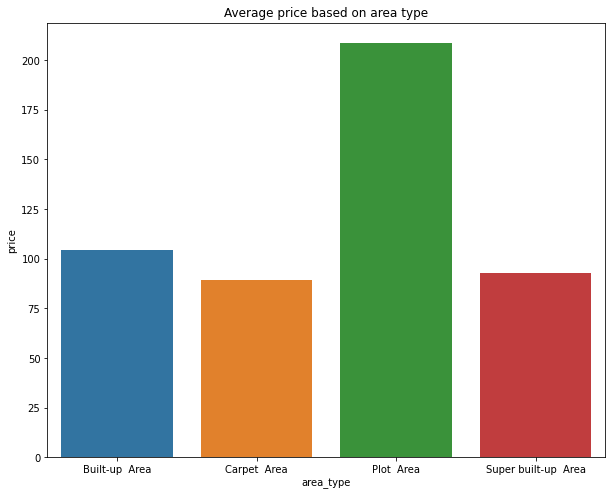

In [7]:
avg_price_by_area_type = df.groupby('area_type')['price'].agg('mean')

plt.figure(figsize=(10,8))
sns.barplot(x=avg_price_by_area_type.index, y=avg_price_by_area_type)
plt.title('Average price based on area type')

<AxesSubplot:xlabel='availability', ylabel='price'>

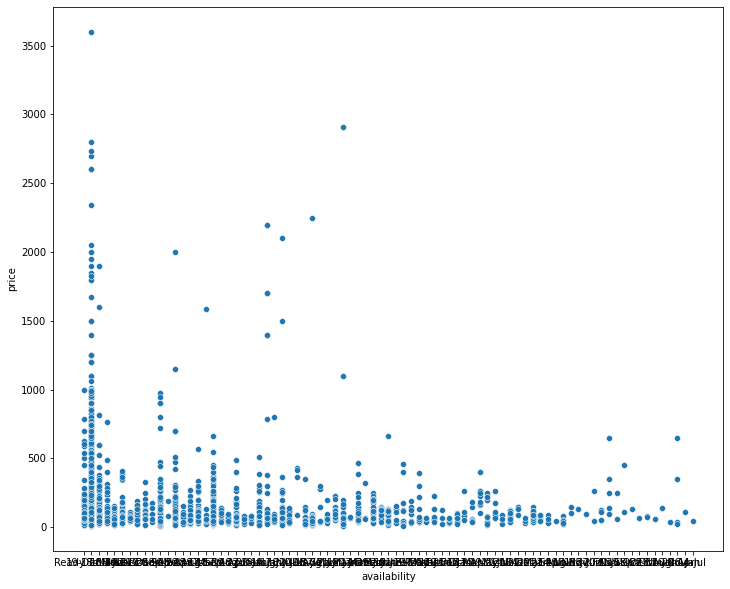

In [8]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='availability', y='price', data=df)

In [9]:
df_v2 = df.drop(['availability'], axis=1)

In [10]:
df_v2['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [11]:
df_v2[df_v2['location'].isnull()]

,area_type,location,size,society,total_sqft,bath,balcony,price
568,Super built-up Area,NaN,3 BHK,Grare S,1600,3.0,2.0,86.0


In [12]:
df_v2[df_v2['society']=='Grare S']

,area_type,location,size,society,total_sqft,bath,balcony,price
568,Super built-up Area,NaN,3 BHK,Grare S,1600,3.0,2.0,86.0
12238,Carpet Area,Anantapura,3 BHK,Grare S,1600,3.0,2.0,77.0


In [13]:
df_v2.loc[568,'location'] = 'Anantapura'

In [14]:
df_v2.isnull().sum()

area_type        0
location         0
size            16
society       5502
total_sqft       0
bath            73
balcony        609
price            0
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, 'Cubbon Road'),
  Text(1, 0, 'Ashok Nagar'),
  Text(2, 0, 'Defence Colony'),
  Text(3, 0, 'Yemlur'),
  Text(4, 0, 'Church Street'),
  Text(5, 0, 'D Souza Layout'),
  Text(6, 0, 'Sadashiva Nagar'),
  Text(7, 0, 'Sindhi Colony'),
  Text(8, 0, 'Srinivas Colony'),
  Text(9, 0, '5th Block Jayanagar'),
  Text(10, 0, 'Binnamangala'),
  Text(11, 0, 'Cunningham Road'),
  Text(12, 0, 'Hunasamaranahalli'),
  Text(13, 0, '2nd Block Koramangala'),
  Text(14, 0, 'Shanthala Nagar'),
  Text(15, 0, 'Dollars Colony'),
  Text(16, 0, 'Kathreguppe'),
  Text(17, 0, 'Sector 4 HSR Layout'),
  Text(18, 0, 'Rest House Road'),
  Text(19, 0, 'Ramakrishnappa Layout'),
  Text(20, 0, '6th block banashankari 3rd stage, 100 feet ORR'),
  Text(21, 0, '1A Block Koramangala'),
  Text(22

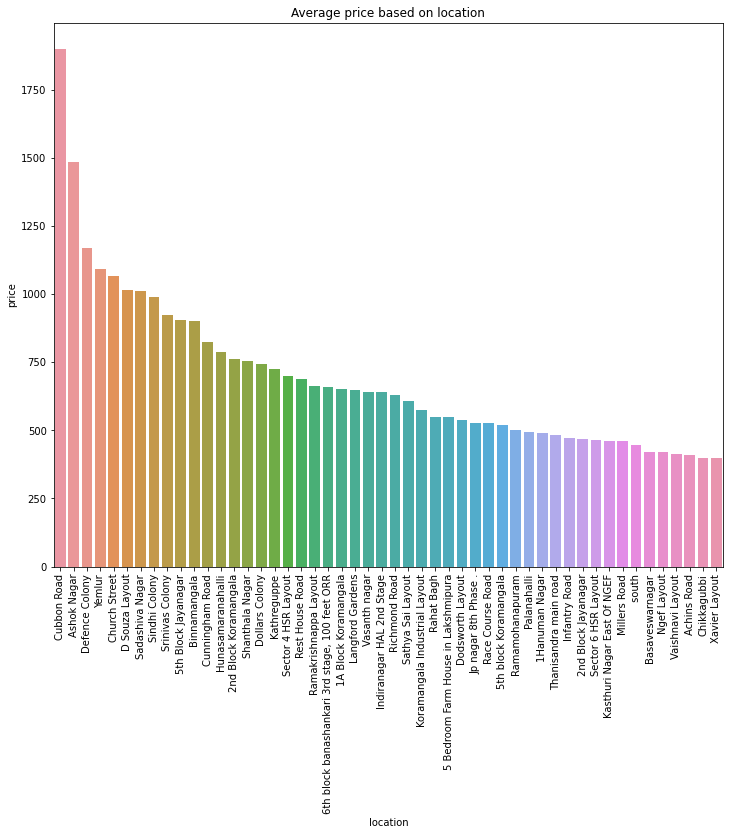

In [15]:
avg_price_by_area_type = df_v2.groupby('location')['price'].agg('mean').sort_values(ascending=False)

plt.figure(figsize=(12,10))
sns.barplot(x=avg_price_by_area_type.index[:50], y=avg_price_by_area_type[:50])
plt.title('Average price based on location')
plt.xticks(rotation=90)


In [16]:
df_v2['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [17]:
df_v2[df_v2['size'].isnull()]

,area_type,location,size,society,total_sqft,bath,balcony,price
579,Plot Area,Sarjapur Road,NaN,Asiss B,1200 - 2400,NaN,NaN,34.185
1775,Plot Area,IVC Road,NaN,Orana N,2000 - 5634,NaN,NaN,124.000
2264,Plot Area,Banashankari,NaN,NaN,2400,NaN,NaN,460.000
2809,Plot Area,Sarjapur Road,NaN,AsdiaAr,1200 - 2400,NaN,NaN,28.785
2862,Plot Area,Devanahalli,NaN,Ajleyor,1500 - 2400,NaN,NaN,46.800
5333,Plot Area,Devanahalli,NaN,Emngs S,2100 - 5405,NaN,NaN,177.115
6423,Plot Area,Whitefield,NaN,SRniaGa,2324,NaN,NaN,26.730
6636,Plot Area,Jigani,NaN,S2enste,1500,NaN,NaN,25.490
6719,Plot Area,Hoskote,NaN,SJowsn,800 - 2660,NaN,NaN,28.545
7680,Plot Area,Kasavanhalli,NaN,NaN,5000,NaN,NaN,400.000


In [18]:
# df_v3 = df_v2.copy()
df_v3 = df_v2[df_v2['size'].notna()]

In [19]:
df_v3.isnull().sum()

area_type        0
location         0
size             0
society       5499
total_sqft       0
bath            57
balcony        593
price            0
dtype: int64

In [20]:
df_v3['bhk'] = df_v3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\ugosw\AppData\Local\Temp\ipykernel_8124\3831265650.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_v3['bhk'] = df_v3['size'].apply(lambda x: int(x.split(' ')[0]))


In [21]:
df_v3.head()

,area_type,location,size,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,2


In [22]:
df_v3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [23]:
df_v3[df_v3['bhk']>20]

,area_type,location,size,society,total_sqft,bath,balcony,price,bhk
1718,Super built-up Area,2Electronic City Phase II,27 BHK,NaN,8000,27.0,0.0,230.0,27
4684,Plot Area,Munnekollal,43 Bedroom,NaN,2400,40.0,0.0,660.0,43


In [24]:
df_v4 = df_v3.drop(index=[1718,4684])

In [25]:
df_v4.head()

,area_type,location,size,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,2


In [26]:
df_v4.isnull().sum()

area_type        0
location         0
size             0
society       5497
total_sqft       0
bath            57
balcony        593
price            0
bhk              0
dtype: int64

<AxesSubplot:xlabel='bhk', ylabel='price'>

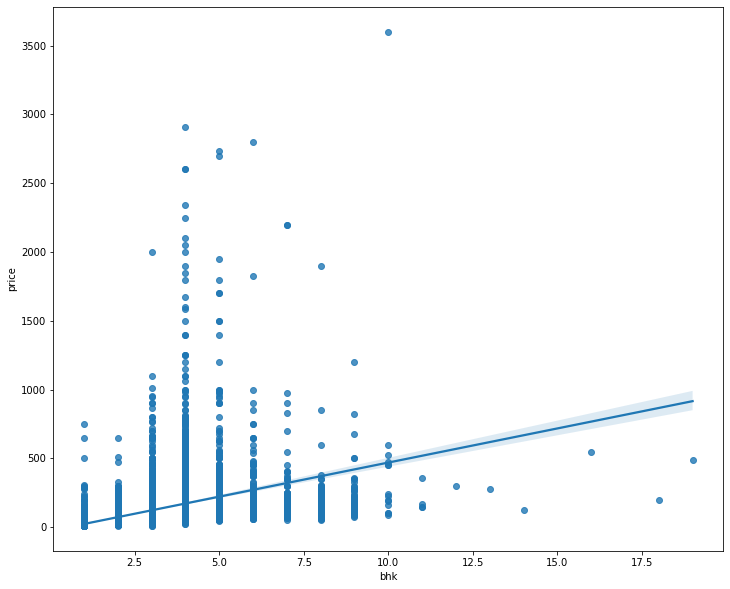

In [27]:
plt.figure(figsize=(12,10))
sns.regplot(x='bhk', y='price', data=df_v4)

In [28]:
df_v4 = df_v4.drop(['society'], axis=1)

In [29]:
df_v4.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [30]:
df_v4.dtypes

area_type      object
location       object
size           object
total_sqft     object
bath          float64
balcony       float64
price         float64
bhk             int64
dtype: object

In [31]:
df_v4['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [32]:
df_v4[df_v4['total_sqft'].str.contains('[a-zA-Z]')]

,area_type,location,size,total_sqft,bath,balcony,price,bhk
410,Super built-up Area,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.50,1
648,Built-up Area,Arekere,9 Bedroom,4125Perch,9.0,NaN,265.00,9
775,Built-up Area,Basavanagara,1 BHK,1000Sq. Meter,2.0,1.0,93.00,1
872,Super built-up Area,Singapura Village,2 BHK,1100Sq. Yards,2.0,NaN,45.00,2
1019,Plot Area,Marathi Layout,1 Bedroom,5.31Acres,1.0,0.0,110.00,1
1086,Plot Area,Narasapura,2 Bedroom,30Acres,2.0,2.0,29.50,2
1400,Super built-up Area,Chamrajpet,9 BHK,716Sq. Meter,9.0,1.0,296.00,9
1712,Plot Area,Singena Agrahara,3 Bedroom,1500Sq. Meter,3.0,1.0,95.00,3
1743,Super built-up Area,Hosa Road,3 BHK,142.61Sq. Meter,3.0,1.0,115.00,3
1821,Plot Area,Sarjapur,3 Bedroom,1574Sq. Yards,3.0,1.0,76.00,3


In [33]:
df_v5 = df_v4.copy()

for row in df_v5.index:
    if 'Sq. Meter' in (df_v5.loc[row,'total_sqft']):
        df_v5.loc[row,'total_sqft'] = float(df_v5.loc[row,'total_sqft'].split('S')[0])*10.764
    elif 'Sq. Yards' in (df_v5.loc[row,'total_sqft']):
        df_v5.loc[row,'total_sqft'] = float(df_v5.loc[row,'total_sqft'].split('S')[0])*9.0
    elif 'Perch' in (df_v5.loc[row,'total_sqft']):
        df_v5.loc[row,'total_sqft'] = float(df_v5.loc[row,'total_sqft'].split('P')[0])*272.25
    elif 'Acres' in (df_v5.loc[row,'total_sqft']):
        df_v5.loc[row,'total_sqft'] = float(df_v5.loc[row,'total_sqft'].split('A')[0])*43560
    elif 'Cents' in (df_v5.loc[row,'total_sqft']):
        df_v5.loc[row,'total_sqft'] = float(df_v5.loc[row,'total_sqft'].split('C')[0])*435.56
    elif 'Guntha' in (df_v5.loc[row,'total_sqft']):
        df_v5.loc[row,'total_sqft'] = float(df_v5.loc[row,'total_sqft'].split('G')[0])*1089
    elif 'Grounds' in (df_v5.loc[row,'total_sqft']):
        df_v5.loc[row,'total_sqft'] = float(df_v5.loc[row,'total_sqft'].split('G')[0])*2400
        
    

In [34]:
df_v5.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [35]:
def sqft_to_float(sqft):
    try:
        if '-' in sqft:
            left,right = sqft.split('-')
            return (float(left.strip())+float(right.strip()))/2
        else:
            return float(sqft)
    except:
        return sqft

In [36]:
df_v5['total_sqft'] = df_v5['total_sqft'].apply(sqft_to_float)

In [37]:
df_v5.total_sqft.std()

17288.295590653157

In [38]:
plt.figure(figsize=(12,10))
# sns.boxplot(df_v5['total_sqft'])
# sns.distplot(df_v5['total_sqft'])
df_v5['total_sqft'].mean()

1910.7101599789507

<Figure size 864x720 with 0 Axes>

In [39]:
df_v5.isnull().sum()

area_type       0
location        0
size            0
total_sqft      0
bath           57
balcony       593
price           0
bhk             0
dtype: int64

In [40]:
df_v5[df_v5['bath'].isnull()]

,area_type,location,size,total_sqft,bath,balcony,price,bhk
56,Built-up Area,Devanahalli,4 Bedroom,3210.0,NaN,NaN,192.000,4
81,Built-up Area,Hennur Road,4 Bedroom,3203.5,NaN,NaN,224.500,4
224,Super built-up Area,Devanahalli,3 BHK,1630.0,NaN,NaN,74.820,3
344,Super built-up Area,Kanakpura Road,1 BHK,525.0,NaN,NaN,21.530,1
669,Super built-up Area,JP Nagar,5 BHK,5520.0,NaN,NaN,375.000,5
702,Super built-up Area,JP Nagar,5 BHK,5600.0,NaN,NaN,548.500,5
801,Super built-up Area,JP Nagar,4 BHK,4624.5,NaN,NaN,453.000,4
941,Super built-up Area,Whitefield,4 Bedroom,4348.5,NaN,NaN,304.000,4
1264,Built-up Area,Hennur,3 Bedroom,2264.0,NaN,NaN,155.000,3
1267,Super built-up Area,Yelahanka,3 BHK,1662.0,NaN,NaN,67.980,3


In [41]:
df_v6 = df_v5[df_v5['bath'].notna()]

In [42]:
df_v6 = df_v6.drop('balcony', axis=1)

In [43]:
df_v6.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [44]:
df_v6.head()

,area_type,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2


c:\Users\ugosw\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\ugosw\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


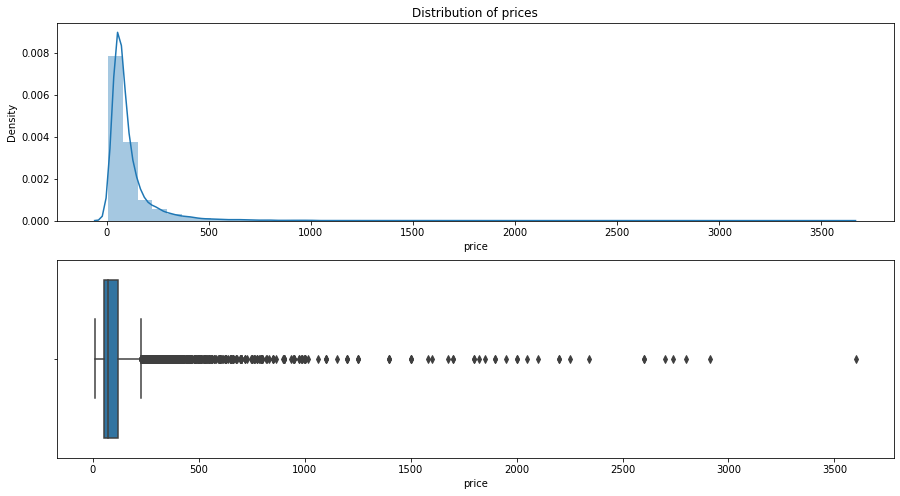

In [45]:
plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
plt.title('Distribution of prices')
sns.distplot(df_v2['price'], kde=True)
plt.subplot(2,1,2)
sns.boxplot(df_v2['price'])
plt.show()

In [46]:
df_v6['price_per_sqft'] = (df_v6['price']*100000)/df_v6['total_sqft']
df_v6.head()

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [47]:
len(df_v6['location'].unique())

1303

In [48]:
location_unique = df_v6['location'].value_counts().sort_values(ascending=False)

In [49]:
location_unique.tail(10)

Thirupalya                           1
Ananthapura, T C palaya Main Road    1
Chikbasavanapura                     1
Jayanagar,                           1
KAMAKIYA                             1
Wheelers Road                        1
MM Layout                            1
Bharathnagar                         1
Thirumalashettyhally                 1
Abshot Layout                        1
Name: location, dtype: int64

In [50]:
location_unique_less_10 = location_unique[location_unique<10]

In [51]:
df_v6['location'] = df_v6['location'].apply(lambda x: 'other' if x in location_unique_less_10 else x)
len(df_v6['location'].unique())

254

In [52]:
df_v6.head()

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [53]:
df_v6[df_v6['total_sqft']/df_v6['bhk']<300]

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,Plot Area,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,Plot Area,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Plot Area,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Plot Area,other,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,Plot Area,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...,...
13277,Plot Area,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,Plot Area,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Plot Area,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Plot Area,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [54]:
df_v6.shape

(13245, 8)

In [55]:
df_v7 = df_v6[~(df_v6['total_sqft']/df_v6['bhk']<300)]
df_v7.shape

(12499, 8)

c:\Users\ugosw\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_per_sqft'>

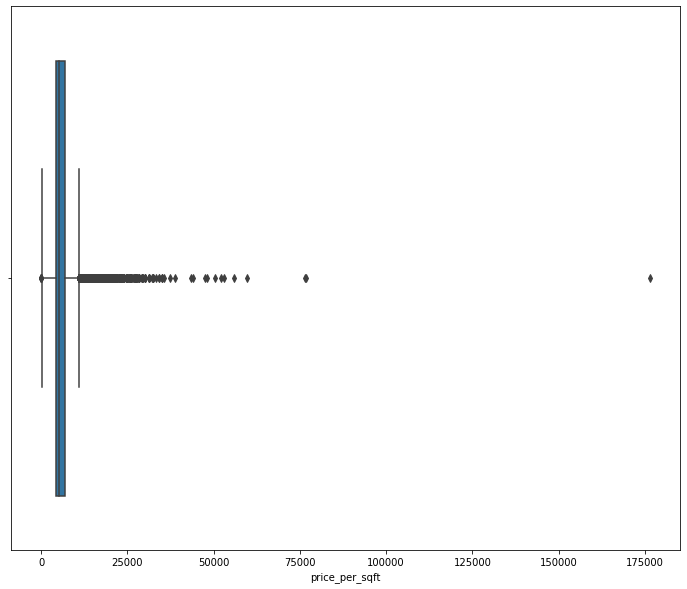

In [56]:
plt.figure(figsize=(12,10))
sns.boxplot(df_v7['price_per_sqft'])

In [57]:
df_v7['price_per_sqft'].describe()

count     12499.000000
mean       6298.824107
std        4168.971540
min           2.257423
25%        4203.633940
50%        5291.005291
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [58]:
# def outlier_remove_price_per_sqft(df):
#     df_outlier = pd.DataFrame()

#     for key,subdf in df.groupby('location'):
#         mean =  np.mean(subdf.price_per_sqft)
#         std = np.std(subdf.price_per_sqft)
#         reduced_df = subdf[(subdf.price_per_sqft<mean+3*std) & (subdf.price_per_sqft>mean-3*std)]
#         df_outlier = pd.concat([df_outlier,reduced_df], ignore_index = True)
#     return df_outlier

In [59]:
def outlier_remove_price_per_sqft_iqr(df, q1=0.25, q3=0.75):
    df_outlier = pd.DataFrame()

    for key,subdf in df.groupby('location'):
        quartile1 = subdf['price_per_sqft'].quantile(q1)
        quartile3 = subdf['price_per_sqft'].quantile(q3)
        iqr = quartile3 - quartile1
        upper_limit = quartile3 + 1.5*iqr
        lower_limit = quartile1 - 1.5*iqr
        reduced_df = subdf[(subdf.price_per_sqft<upper_limit) & (subdf.price_per_sqft>lower_limit)]
        df_outlier = pd.concat([df_outlier,reduced_df], ignore_index = True)
    return df_outlier

In [60]:
df_v8 = outlier_remove_price_per_sqft_iqr(df_v7)
df_v8.shape

(11616, 8)

c:\Users\ugosw\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_per_sqft'>

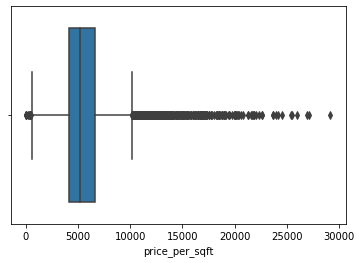

In [61]:
sns.boxplot(df_v8['price_per_sqft'])

c:\Users\ugosw\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

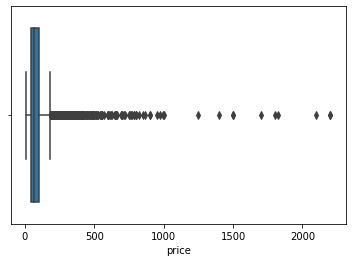

In [62]:
sns.boxplot(df_v8['price'])

In [63]:
def scatter_plot_bhk(df,location):
    bhk2 = df[(df['location']==location) & (df['bhk']==2)]
    bhk3 = df[(df['location']==location) & (df['bhk']==3)]
    plt.figure(figsize=(10,8))
    sns.scatterplot(bhk2.total_sqft, bhk2.price, color='blue', label='2bhk')
    sns.scatterplot(bhk3.total_sqft, bhk3.price, color='green', label='3bhk')
    plt.xlabel("Total sqft area")
    plt.ylabel("Price per sqft")
    plt.title('location')
    plt.legend()

c:\Users\ugosw\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ugosw\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


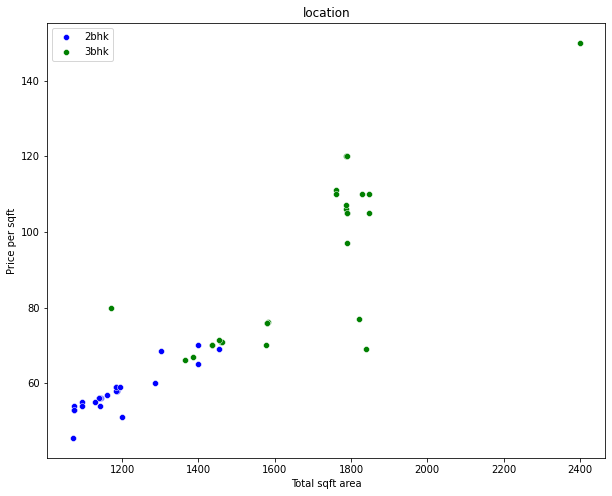

In [64]:
scatter_plot_bhk(df_v8,'Kothanur')

In [65]:
def outlier_remove_bhk(df):
    exclude_indices = np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']> 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

In [66]:
df_v9 = outlier_remove_bhk(df_v8)

c:\Users\ugosw\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ugosw\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


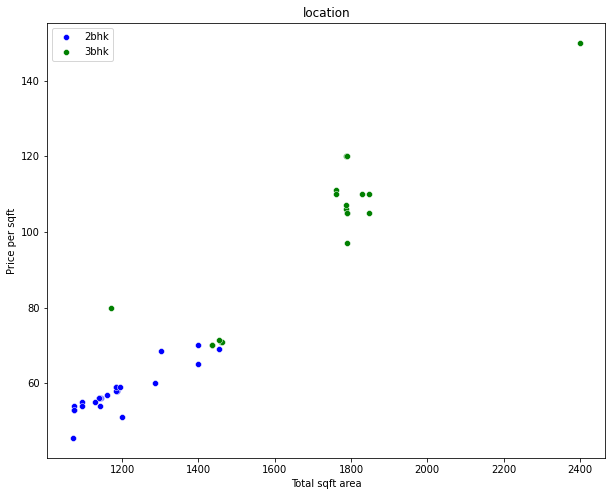

In [67]:
scatter_plot_bhk(df_v9,'Kothanur')

<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

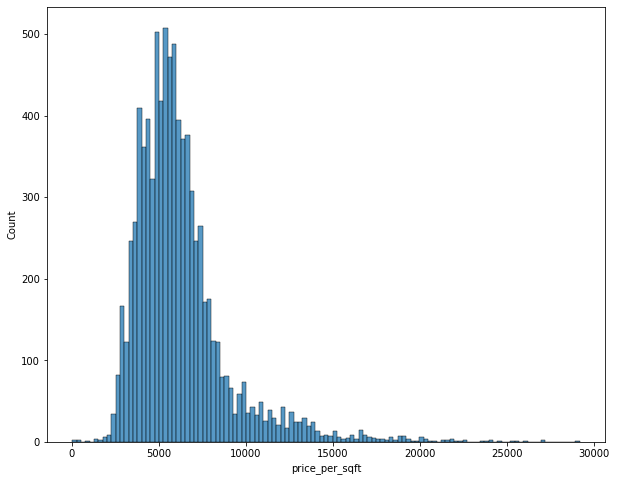

In [68]:
plt.figure(figsize=(10,8))
sns.histplot(df_v9.price_per_sqft)

In [69]:
df_v9['bath'].unique()

array([ 2.,  3.,  4.,  5.,  1.,  8.,  7.,  6., 14.,  9., 12., 10., 16.,
       13.])

Text(0.5, 1.0, 'Number of baths')

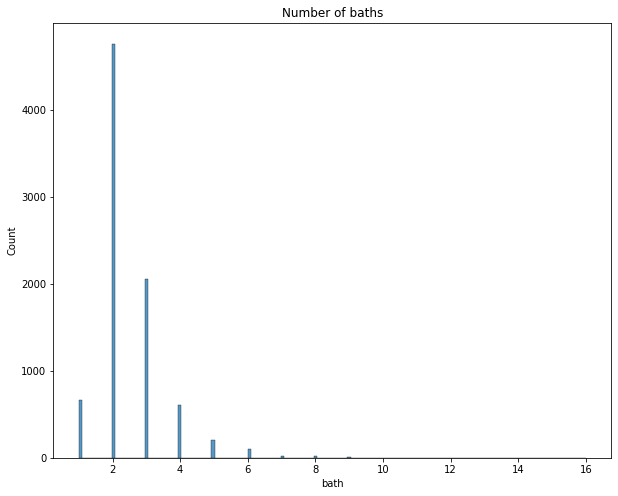

In [70]:
plt.figure(figsize=(10,8))
sns.histplot(df_v9['bath'])
plt.title('Number of baths')

In [71]:
df_v9[df_v9['bath']>df_v9['bhk']+2]

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
683,Plot Area,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
1871,Built-up Area,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
6191,Built-up Area,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6791,Super built-up Area,Rajaji Nagar,5 BHK,7500.0,8.0,1700.0,5,22666.666667
8018,Super built-up Area,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
9837,Super built-up Area,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [72]:
df_v9 = df_v9[df_v9['bath']<df_v9['bhk']+2]
df_v9.shape

(8360, 8)

In [73]:
df_v10 = df_v9.drop(['size','price_per_sqft','area_type'], axis='columns')
df_v10.head()

,location,total_sqft,bath,price,bhk
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1170.0,2.0,40.0,2
3,Devarachikkanahalli,1425.0,2.0,65.0,3
4,Devarachikkanahalli,947.0,2.0,43.0,2
5,Devarachikkanahalli,1130.0,2.0,36.0,2


In [74]:
df_dummy = pd.get_dummies(df_v10['location'])
df_dummy.head()

,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
df_dummy = df_dummy.drop(['other'], axis='columns')
df_dummy.head()

,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
df_v11 = pd.concat([df_v10, df_dummy], axis='columns')
df_v11 = df_v11.drop(['location'], axis='columns')
df_v11.head()

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1170.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1425.0,2.0,65.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,947.0,2.0,43.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1130.0,2.0,36.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
X = df_v11.drop(['price'], axis='columns')
y = df_v11.price

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [79]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
pred_lr = model_lr.predict(X_test)

In [80]:
model_lr.score(X_test,y_test)

0.5126618227248254

In [81]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=7, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.41193936, 0.48920648, 0.23695229, 0.51454168, 0.15564606,
       0.523278  , 0.49315292])

In [82]:
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

In [87]:

def find_best_model_gridsearchcv(X, y):
    algos = {
        # 'linear_regression':{
        #     'model':LinearRegression(),
        #     'params':{
        #         'normalize':[True,False]
        #     }
        # },
        
        'random_forest':{
            'model':RandomForestRegressor(),
            'params':{
                'n_estimators':[250,300,350],
                'random_state':[1],
                # 'criterian':['squared_error','poisson'],
                'min_samples_split':[2,5,10]

            }
        },
        'gradient_boosting':{
            'model':GradientBoostingRegressor(),
            'params':{
                'n_estimators':[250,300,350],
                'random_state':[1],
                'max_depth':[2,5,10],

            }
        },
        # 'support_vector_regression':{
        #     'model':SVR(),
        #     'params':{
        #         # 'kernel':['rbf','poly'],
        #         'gamma':[0.3,0.5],
        #     }
        # }
    }
    scores= []
    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'],cv =cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model':algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [88]:
find_best_model_gridsearchcv(X,y)

,model,best_score,best_params
0,random_forest,0.762178,"{'min_samples_split': 2, 'n_estimators': 300, ..."
1,gradient_boosting,0.791578,"{'max_depth': 2, 'n_estimators': 350, 'random_..."


In [85]:
# model_rf = RandomForestRegressor(n_estimators=200, random_state=1)
# model_rf.fit(X_train, y_train)
# pred_rf = model_rf.predict(X_test)


In [86]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns == location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] =sqft
    x[1] = bath
    x[2] = bhk

    if loc_index>=0:
        x[loc_index] = 1
    return model_rf.predict([x])[0]